# **Project1:Query a Digital Music Store**
>In this project, I will query the Chinook Database. The Chinook Database holds information about a music store. For this project, I will be assisting the Chinook team with understanding the media in their store, their customers and employees, and their invoice information.

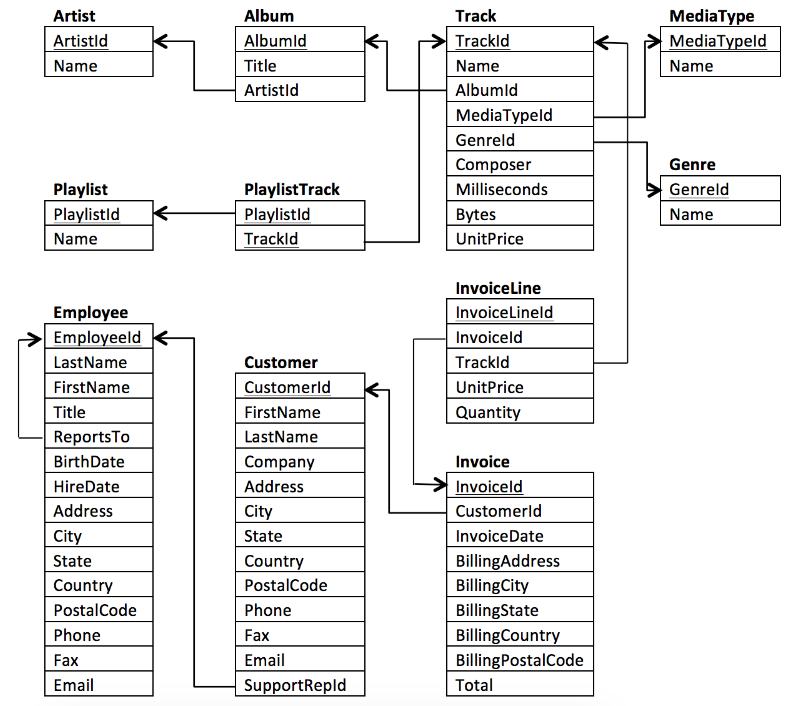

## **IMPORT LIBRARIES**

In [ ]:
import plotly 
import plotly.express as px
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandasql as ps
from pandasql import sqldf
import sqlite3

> <A> Install pandsql to write SQL QUERY by python 

In [ ]:
#!pip install pandasql

## **Database Connection Code**

In [ ]:
path = "../input/" 
database = '/content/chinook.db'

In [ ]:
conn = sqlite3.connect(database)

In [ ]:
tables = pd.read_sql("""SELECT *
                  FROM Album;""", conn)
print("Conection SuccessFull",conn)

Conection SuccessFull <sqlite3.Connection object at 0x7f9b210456c0>


In [ ]:
df = pd.read_sql_query("""SELECT *
                  FROM Album;""", conn)
df

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


## **READ DATA**

In [ ]:
Album = pd.read_csv('/content/Album.csv')
Artist = pd.read_csv('/content/Artist.csv')
customer = pd.read_csv('/content/Customer.csv')
Employee = pd.read_csv('/content/Employee.csv')
Genre = pd.read_csv('/content/Genre.csv')
Invoice = pd.read_csv('/content/Invoice.csv')
InvoiceLine = pd.read_csv('/content/InvoiceLine.csv')
MediaType = pd.read_csv('/content/MediaType.csv')
Playlist = pd.read_csv('/content/Playlist.csv')
PlaylistTrack = pd.read_csv('/content/PlaylistTrack.csv')
Track = pd.read_csv('/content/Track.csv')

### **GENRE&TRACK**

In [ ]:
df_task_hungry_sectors = """SELECT *
                  FROM Genre G
                  JOIN Track T
                  ON T.GenreId = G.GenreId;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_1', index=False)

In [ ]:
track_genre = pd.read_csv('/content/join_1')
track_genre

,GenreId,Name,TrackId,Name.1,AlbumId,MediaTypeId,GenreId.1,Composer,Milliseconds,Bytes,UnitPrice
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,1,NaN,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99
3,1,Rock,4,Restless and Wild,3,2,1,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",252051,4331779,0.99
4,1,Rock,5,Princess of the Dawn,3,2,1,Deaffy & R.A. Smith-Diesel,375418,6290521,0.99
...,...,...,...,...,...,...,...,...,...,...,...
3498,24,Classical,3499,Pini Di Roma (Pinien Von Rom) \ I Pini Della V...,343,2,24,NaN,286741,4718950,0.99
3499,24,Classical,3500,"String Quartet No. 12 in C Minor, D. 703 ""Quar...",344,2,24,Franz Schubert,139200,2283131,0.99
3500,24,Classical,3501,"L'orfeo, Act 3, Sinfonia (Orchestra)",345,2,24,Claudio Monteverdi,66639,1189062,0.99
3501,24,Classical,3502,"Quintet for Horn, Violin, 2 Violas, and Cello ...",346,2,24,Wolfgang Amadeus Mozart,221331,3665114,0.99


### **The most popular genre of music in the store**

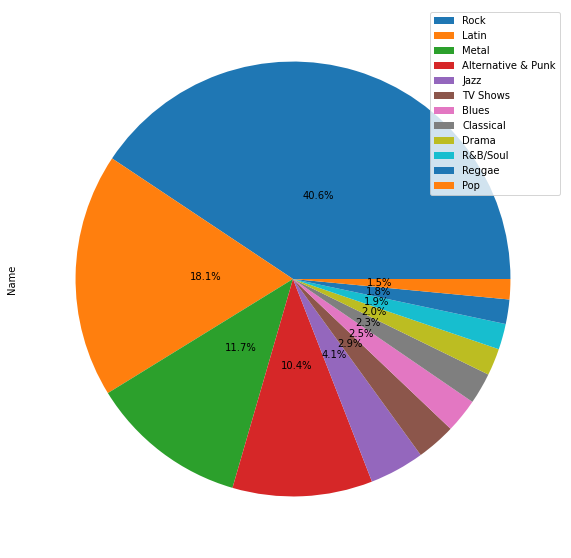

In [ ]:
plt.figure(figsize=(10,10))
track_genre['Name'].value_counts()[:12].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

In [ ]:
df_task_hungry_sectors = """SELECT G.Name, COUNT(*) AS Most_Genre
                  FROM Genre G
                  JOIN Track T
                  ON T.GenreId = G.GenreId
                  GROUP BY G.Name
                  ORDER BY Most_Genre DESC;"""
ps.sqldf(df_task_hungry_sectors).to_csv('out.zip', index=False)

In [ ]:
Most_Genre = pd.read_csv('/content/out.zip')
Most_Genre

,Name,Most_Genre
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


In [ ]:
fig = px.bar(Most_Genre, x='Name', y='Most_Genre',width=800, height=400 ,color='Most_Genre',
             labels={'pop':'population of Canada'})
fig.show()

In [ ]:
df_task_hungry_sectors = """SELECT R.Name,count(L.Title) as count_album
                            FROM Artist R
                            JOIN Album L
                            ON  R.ArtistId = L.ArtistId
                            group by R.Name
                            order by count_album desc
                            limit 10
                    ;"""
ps.sqldf(df_task_hungry_sectors).to_csv('Name_artist', index=False)

In [ ]:
Name_artist = pd.read_csv('/content/Name_artist')
Name_artist

,Name,count_album
0,Iron Maiden,21
1,Led Zeppelin,14
2,Deep Purple,11
3,Metallica,10
4,U2,10
5,Ozzy Osbourne,6
6,Pearl Jam,5
7,Faith No More,4
8,Foo Fighters,4
9,Lost,4


## **What are the 10 popular artists to the popular albums in the store?**

In [ ]:
fig = px.bar(Name_artist, x='Name', y='count_album',width=800, height=400 ,color='count_album',
             labels={'pop':'population of Canada'})
fig.show()

In [ ]:
df_task_hungry_sectors = """SELECT L.Title,count(L.Title) as count_album
                            FROM Artist R
                            JOIN Album L
                            ON  R.ArtistId = L.ArtistId
                            JOIN Track T
                            ON  T.AlbumId = L.AlbumId
                            JOIN Genre G
                            ON  G.GenreId = T.GenreId
                            where G.Name = 'Jazz'
                            group by L.Title
                            order by count_album desc
                            limit 10
                    ;"""
ps.sqldf(df_task_hungry_sectors).to_csv('genre_jazz', index=False)

In [ ]:
genre_jazz = pd.read_csv('/content/genre_jazz')
genre_jazz

,Title,count_album
0,Up An' Atom,22
1,Miles Ahead,14
2,Warner 25 Anos,14
3,Blue Moods,13
4,The Essential Miles Davis [Disc 1],13
5,Heart of the Night,12
6,The Essential Miles Davis [Disc 2],10
7,Morning Dance,9
8,Outbreak,9
9,The Best Of Billy Cobham,8


## **What is the most popular album of the jazz music?**

In [ ]:
fig = px.bar(genre_jazz, x='Title', y='count_album',width=800, height=400 ,color='count_album',
             labels={'pop':'population of Canada'})
fig.show()



---

### **INVOICE & CUSTOMER**

In [ ]:
df_task_hungry_sectors = """SELECT *
                  FROM Invoice I
                  JOIN customer C
                  ON I.CustomerId = C.CustomerId;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_2', index=False)

In [ ]:
invoice_customer = pd.read_csv('/content/join_2')
invoice_customer

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total,CustomerId.1,...,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId
0,1,2,2009-01-01 00:00:00,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,1.98,2,...,NaN,Theodor-Heuss-Straße 34,Stuttgart,NaN,Germany,70174,+49 0711 2842222,NaN,leonekohler@surfeu.de,5
1,2,4,2009-01-02 00:00:00,Ullevålsveien 14,Oslo,NaN,Norway,0171,3.96,4,...,NaN,Ullevålsveien 14,Oslo,NaN,Norway,0171,+47 22 44 22 22,NaN,bjorn.hansen@yahoo.no,4
2,3,8,2009-01-03 00:00:00,Grétrystraat 63,Brussels,NaN,Belgium,1000,5.94,8,...,NaN,Grétrystraat 63,Brussels,NaN,Belgium,1000,+32 02 219 03 03,NaN,daan_peeters@apple.be,4
3,4,14,2009-01-06 00:00:00,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,8.91,14,...,Telus,8210 111 ST NW,Edmonton,AB,Canada,T6G 2C7,+1 (780) 434-4554,+1 (780) 434-5565,mphilips12@shaw.ca,5
4,5,23,2009-01-11 00:00:00,69 Salem Street,Boston,MA,USA,2113,13.86,23,...,NaN,69 Salem Street,Boston,MA,USA,2113,+1 (617) 522-1333,NaN,johngordon22@yahoo.com,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,319 N. Frances Street,Madison,WI,USA,53703,3.96,25,...,NaN,319 N. Frances Street,Madison,WI,USA,53703,+1 (608) 257-0597,NaN,vstevens@yahoo.com,5
408,409,29,2013-12-06 00:00:00,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,5.94,29,...,NaN,796 Dundas Street West,Toronto,ON,Canada,M6J 1V1,+1 (416) 363-8888,NaN,robbrown@shaw.ca,3
409,410,35,2013-12-09 00:00:00,"Rua dos Campeões Europeus de Viena, 4350",Porto,NaN,Portugal,NaN,8.91,35,...,NaN,"Rua dos Campeões Europeus de Viena, 4350",Porto,NaN,Portugal,NaN,+351 (225) 022-448,NaN,masampaio@sapo.pt,4
410,411,44,2013-12-14 00:00:00,Porthaninkatu 9,Helsinki,NaN,Finland,00530,13.86,44,...,NaN,Porthaninkatu 9,Helsinki,NaN,Finland,00530,+358 09 870 2000,NaN,terhi.hamalainen@apple.fi,3


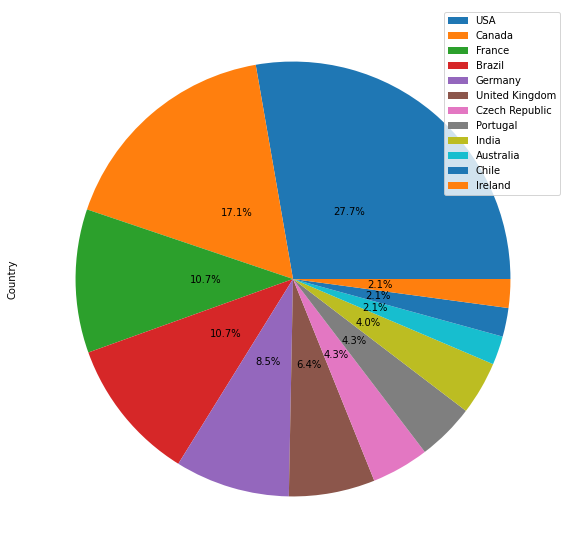

In [ ]:
plt.figure(figsize=(10,10))
invoice_customer['Country'].value_counts()[:12].plot(kind='pie',autopct='%1.1f%%', labeldistance = None, pctdistance = 0.4, textprops={'fontsize': 10})
plt.legend( loc='best')

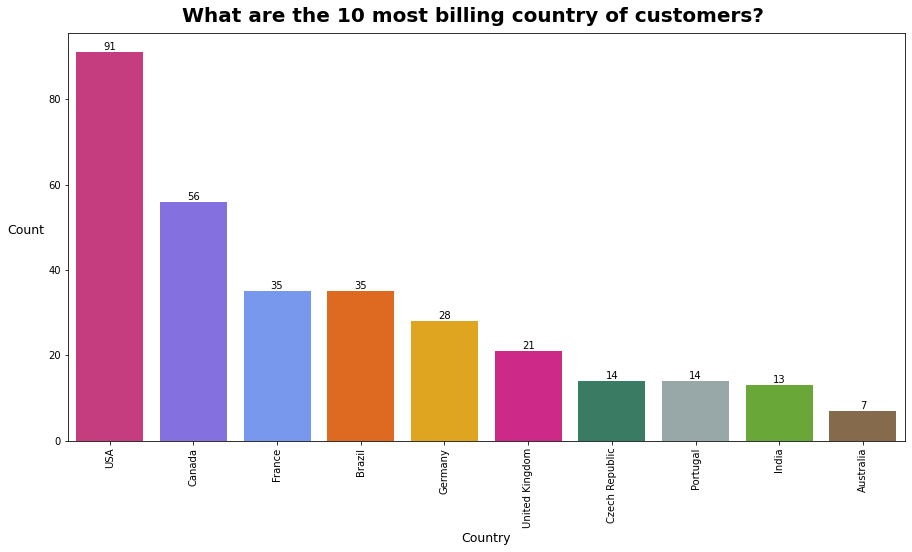

In [ ]:
import seaborn as sns 
plt.figure(figsize=(15,7.5)) #figsize must be applied before plotting the graph

#always make sure to use color blind palette accesible for all viewers! 
color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42",
                       "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]

most_listed_occupations = sns.barplot(x=invoice_customer['Country'].value_counts().head(10).index,
                                      y=invoice_customer['Country'].value_counts().head(10).values, palette=color_blind_palette)

plt.xticks(rotation='vertical') #text rotation on x axis for readability
plt.xlabel('Country', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)
plt.figtext(.5,.9,"What are the 10 most billing country of customers?", fontsize=20, fontweight='bold', fontname='helvetica', ha='center') #formatted title

for patch in most_listed_occupations.patches:
             most_listed_occupations.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
df_task_hungry_sectors = """SELECT C.Country ,count(*) as Count
                  FROM Invoice I
                  JOIN customer C
                  ON I.CustomerId = C.CustomerId
                  Group by C.Country
                  order by Count desc
                  limit 10;"""
ps.sqldf(df_task_hungry_sectors)

,Country,Count
0,USA,91
1,Canada,56
2,Brazil,35
3,France,35
4,Germany,28
5,United Kingdom,21
6,Czech Republic,14
7,Portugal,14
8,India,13
9,Argentina,7


In [ ]:
df_task_hungry_sectors = """SELECT *
                  FROM Playlist I
                  JOIN PlaylistTrack C
                  ON I.PlaylistId = C.PlaylistId;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_3', index=False)

In [ ]:
PlaylistTrack = pd.read_csv('/content/join_3')
PlaylistTrack

,PlaylistId,Name,PlaylistId.1,TrackId
0,1,Music,1,1
1,1,Music,1,2
2,1,Music,1,3
3,1,Music,1,4
4,1,Music,1,5
...,...,...,...,...
8710,17,Heavy Metal Classic,17,2094
8711,17,Heavy Metal Classic,17,2095
8712,17,Heavy Metal Classic,17,2096
8713,17,Heavy Metal Classic,17,3290


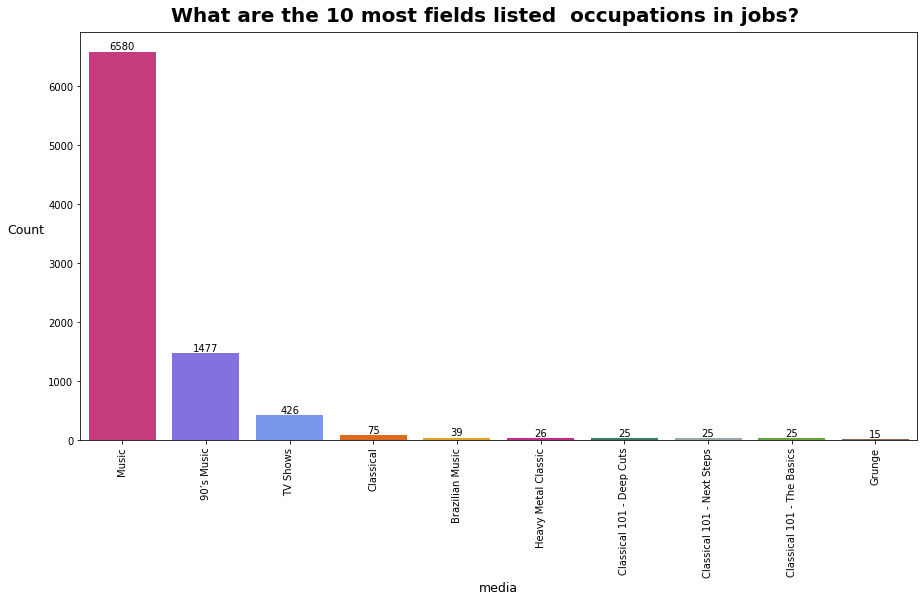

In [ ]:
import seaborn as sns 
plt.figure(figsize=(15,7.5)) #figsize must be applied before plotting the graph

#always make sure to use color blind palette accesible for all viewers! 
color_blind_palette = ["#DC267F", "#785EF0", "#648FFF", "#FE6100", "#FFB000", "#E80E8D", "#2E8766", "#95ABAC", "#65B925", "#906A42",
                       "#C4D537", "#344A52", "#6C6E06", "#1C4DD2", "#216E00", "#2E03E5", "#A94424", "#7F6EA9", "#9B8453", "#380721"]

most_listed_occupations = sns.barplot(x=PlaylistTrack['Name'].value_counts().head(10).index,
                                      y=PlaylistTrack['Name'].value_counts().head(10).values, palette=color_blind_palette)

plt.xticks(rotation='vertical') #text rotation on x axis for readability
plt.xlabel('media', fontsize=12.5)
plt.ylabel('Count', rotation=0, ha='right', fontsize=12.5)
plt.figtext(.5,.9,"What are the 10 most fields listed  occupations in jobs?", fontsize=20, fontweight='bold', fontname='helvetica', ha='center') #formatted title

for patch in most_listed_occupations.patches:
             most_listed_occupations.annotate("%.0f" % patch.get_height(), (patch.get_x() + patch.get_width() / 2., patch.get_height()),
                 ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                 textcoords='offset points')
plt.show()

In [ ]:
Album 

,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


In [ ]:
Artist

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains
...,...,...
270,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp"
271,272,Emerson String Quartet
272,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon..."
273,274,Nash Ensemble


In [ ]:
df_task_hungry_sectors = """SELECT *
                  FROM Artist I
                  JOIN Album  C
                  ON I.ArtistId = C.ArtistId;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_4', index=False)

In [ ]:
Album_artist = pd.read_csv('/content/join_4')
Album_artist

,ArtistId,Name,AlbumId,Title,ArtistId.1
0,1,AC/DC,1,For Those About To Rock We Salute You,1
1,1,AC/DC,4,Let There Be Rock,1
2,2,Accept,2,Balls to the Wall,2
3,2,Accept,3,Restless and Wild,2
4,3,Aerosmith,5,Big Ones,3
...,...,...,...,...,...
342,271,"Mela Tenenbaum, Pro Musica Prague & Richard Kapp",342,"Locatelli: Concertos for Violin, Strings and C...",271
343,272,Emerson String Quartet,344,Schubert: The Late String Quartets & String Qu...,272
344,273,"C. Monteverdi, Nigel Rogers - Chiaroscuro; Lon...",345,Monteverdi: L'Orfeo,273
345,274,Nash Ensemble,346,Mozart: Chamber Music,274


In [ ]:
InvoiceLine

,InvoiceLineId,InvoiceId,TrackId,UnitPrice,Quantity
0,1,1,2,0.99,1
1,2,1,4,0.99,1
2,3,2,6,0.99,1
3,4,2,8,0.99,1
4,5,2,10,0.99,1
...,...,...,...,...,...
2235,2236,411,3136,0.99,1
2236,2237,411,3145,0.99,1
2237,2238,411,3154,0.99,1
2238,2239,411,3163,0.99,1


In [ ]:
df_task_hungry_sectors = """SELECT C.Name,I.UnitPrice,count(*) as Count
                  FROM InvoiceLine I
                  JOIN PlaylistTrack C
                  ON I.TrackId = C.TrackId
                  group by C.Name
                  order by I.UnitPrice Desc;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_5', index=False)

In [ ]:
InvoiceLine = pd.read_csv('/content/join_5')
InvoiceLine

,Name,UnitPrice,Count
0,TV Shows,1.99,222
1,90’s Music,0.99,954
2,Brazilian Music,0.99,27
3,Classical,0.99,41
4,Classical 101 - Deep Cuts,0.99,19
5,Classical 101 - Next Steps,0.99,15
6,Classical 101 - The Basics,0.99,7
7,Grunge,0.99,7
8,Heavy Metal Classic,0.99,22
9,Music,0.99,4258


In [ ]:
fig = px.bar(InvoiceLine, x='Name', y='UnitPrice',width=800, height=400, color='UnitPrice',
             labels={'pop':'population of Canada'})
fig.show()

In [ ]:
MediaType

,MediaTypeId,Name
0,1,MPEG audio file
1,2,Protected AAC audio file
2,3,Protected MPEG-4 video file
3,4,Purchased AAC audio file
4,5,AAC audio file


In [ ]:
df_task_hungry_sectors = """SELECT M.Name,count(*) as Count
                  FROM MediaType M
                  JOIN Track T
                  ON M.MediaTypeId=T.MediaTypeId
                  group by M.Name
                  order by Count desc
                 ;"""
ps.sqldf(df_task_hungry_sectors).to_csv('join_6', index=False)

In [ ]:
MediaType_track = pd.read_csv('/content/join_6')
MediaType_track

,Name,Count
0,MPEG audio file,3034
1,Protected AAC audio file,237
2,Protected MPEG-4 video file,214
3,AAC audio file,11
4,Purchased AAC audio file,7


In [ ]:
# Plot visualization the tops hards skills.

fig = px.bar(MediaType_track, x='Name', y='Count',width=800, height=400, color='Count',
             labels={'pop':'population of Canada'})
fig.show()

## **SQL Data Cleaning**

>`LEFT pulls a specified number of characters for each row in a specified column starting at the beginning (or from the left). As you saw here, you can pull the first three digits of a phone number using LEFT(phone_number, 3).`


>```RIGHT pulls a specified number of characters for each row in a specified column starting at the end (or from the right). As you saw here, you can pull the last eight digits of a phone number using RIGHT(phone_number, 8).```


>`LENGTH provides the number of characters for each row of a specified column. Here, you saw that we could use this to get the length of each phone number as LENGTH(phone_number).`

In [ ]:
#Invoice.astype(str)
#Invoice['BillingAddress'] = Invoice['BillingAddress'].astype('str')

In [ ]:
#a=lambda x: str(x).split(',')
#Invoice['BillingAddress'].apply(a)
Invoice['BillingAddress']= Invoice['BillingAddress'].str.split(',')

In [ ]:
print(Invoice.dtypes)

InvoiceId              int64
CustomerId             int64
InvoiceDate           object
BillingAddress        object
BillingCity           object
BillingState          object
BillingCountry        object
BillingPostalCode     object
Total                float64
dtype: object


>There is no LEFT(),Right function in SQLite.
Use substr()

In [ ]:
#df_task_hungry_sectors = """SELECT BillingCountry,substr(BillingCountry,4, 5) AS ExtractString
#                         FROM Invoice                  ;"""
#ps.sqldf(df_task_hungry_sectors)

In [ ]:
Invoice

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,1,2,2009-01-01 00:00:00,[Theodor-Heuss-Straße 34],Stuttgart,NaN,Germany,70174,1.98
1,2,4,2009-01-02 00:00:00,[Ullevålsveien 14],Oslo,NaN,Norway,0171,3.96
2,3,8,2009-01-03 00:00:00,[Grétrystraat 63],Brussels,NaN,Belgium,1000,5.94
3,4,14,2009-01-06 00:00:00,[8210 111 ST NW],Edmonton,AB,Canada,T6G 2C7,8.91
4,5,23,2009-01-11 00:00:00,[69 Salem Street],Boston,MA,USA,2113,13.86
...,...,...,...,...,...,...,...,...,...
407,408,25,2013-12-05 00:00:00,[319 N. Frances Street],Madison,WI,USA,53703,3.96
408,409,29,2013-12-06 00:00:00,[796 Dundas Street West],Toronto,ON,Canada,M6J 1V1,5.94
409,410,35,2013-12-09 00:00:00,"[Rua dos Campeões Europeus de Viena, 4350]",Porto,NaN,Portugal,NaN,8.91
410,411,44,2013-12-14 00:00:00,[Porthaninkatu 9],Helsinki,NaN,Finland,00530,13.86


<a>POSITION doesn't work on Sqllite

In [ ]:
#df_task_hungry_sectors = """SELECT InvoiceDate ,STRPOS(InvoiceDate,'-')
#                            FROM Invoice  
#                 ;"""
#ps.sqldf(df_task_hungry_sectors)

In [ ]:
#df_task_hungry_sectors = """SELECT BillingCountry ,LOWER(BillingCountry)
#                             FROM Invoice  
#                 ;"""
#ps.sqldf(df_task_hungry_sectors)

In [ ]:
#df_task_hungry_sectors = """SELECT BillingCountry ,UPPER(BillingCountry)
#                             FROM Invoice  
#                  ;"""
#ps.sqldf(df_task_hungry_sectors)

>CONCAT doesn't be support in sqlite 

>LEFT, RIGHT, and TRIM are all used to select only certain elements of strings, but using them to select elements of a number or date will treat them as strings for the purpose of the function. Though we didn't cover TRIM in this lesson explicitly, it can be used to remove characters from the beginning and end of a string. This can remove unwanted spaces at the beginning or end of a row that often happen with data being moved from Excel or other storage systems.

In [ ]:
df_task_hungry_sectors = """SELECT FirstName ,LastName ,FirstName||' '||LastName as full_name
                             FROM customer 
                             limit 10
                  ;"""
ps.sqldf(df_task_hungry_sectors)

,FirstName,LastName,full_name
0,Luís,Gonçalves,Luís Gonçalves
1,Leonie,Köhler,Leonie Köhler
2,François,Tremblay,François Tremblay
3,Bjørn,Hansen,Bjørn Hansen
4,František,Wichterlová,František Wichterlová
5,Helena,Holý,Helena Holý
6,Astrid,Gruber,Astrid Gruber
7,Daan,Peeters,Daan Peeters
8,Kara,Nielsen,Kara Nielsen
9,Eduardo,Martins,Eduardo Martins


>CAST function
`Then you can change a string to a date using CAST. CAST is actually useful to change lots of column types`
The CAST operator is used to convert a value from a data type to another data type

In [ ]:
#df = """SELECT Total,cast(Total AS INT) as data_type
#                           FROM Invoice;"""
#ps.sqldf(df)


>The SQLite coalesce function returns the first non-null expression in the list.

>The MySQL IFNULL() function lets you return an alternative value if an expression is NULL:

In [ ]:
#SELECT coalesce(null, null, null, 'A', 'B');
df_task_hungry_sectors = """SELECT coalesce(null, null, null, 'A', 'B') as first_nunull
                  ;"""
ps.sqldf(df_task_hungry_sectors)

,first_nunull
0,A


### **PostgreSQL - Python Interface**

In [ ]:
!pip install config

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys
sys.path.append('../../')
import config
%load_ext sql
import os
import psycopg2

In [ ]:
#!pip install psycopg2-binary

In [ ]:
# import psycopg2
# host = "localhost"
# database = "olist"
# user = "postgres"
# password = "sql123"
# connection_string = f"postgresql://{user}:{password}@{host}/{database}"
# %sql $connection_string

## **WINDOW FUNCTION**

**What are Window Functions in SQL?**

`Window functions perform calculations on a set of rows that are related together. But, unlike the aggregate functions, windowing functions do not collapse the result of the rows into a single value. Instead, all the rows maintain their original identity and the calculated result is returned for every row.`

In [ ]:
!pip install -U pandasql

In [ ]:
from pandasql import sqldf
mysql = lambda q: sqldf(q, globals()) 

In [ ]:
#mysql("""SELECT  UnitPrice,SUM(UnitPrice) OVER (ORDER BY Name desc)as Sum_invoice FROM InvoiceLine;""")

`The PARTITION BY clause is used in conjunction with the OVER clause. It breaks up the rows into different partitions. These partitions are then acted upon by the window function`

In [ ]:
# mysql("""SELECT standard_amt_usd,
#        DATE_TRUNC('year', occurred_at) as year,
#        SUM(standard_amt_usd) OVER (PARTITION BY DATE_TRUNC('year', occurred_at) ORDER BY occurred_at) AS running_total
# FROM orders;""")

**Row_Number**

`Sometimes your dataset might not have a column depicting the sequential order of the rows In that case, we can make use of the ROW_NUMBER()`

`The DENSE_RANK() function is similar to the RANK() except for one difference, it doesn’t skip any ranks when ranking rows.`

In [ ]:
#using aliases in window function
# SELECT id,
#        account_id,
#        DATE_TRUNC('year',occurred_at) AS year,
#        DENSE_RANK() OVER account_year_window AS dense_rank,
#        total_amt_usd,
#        SUM(total_amt_usd) OVER account_year_window AS sum_total_amt_usd,
#        COUNT(total_amt_usd) OVER account_year_window AS count_total_amt_usd,
#        AVG(total_amt_usd) OVER account_year_window AS avg_total_amt_usd,
#        MIN(total_amt_usd) OVER account_year_window AS min_total_amt_usd,
#        MAX(total_amt_usd) OVER account_year_window AS max_total_amt_usd
# FROM orders 
# WINDOW account_year_window AS (PARTITION BY account_id ORDER BY DATE_TRUNC('year',occurred_at))

**Scenarios for using LAG and LEAD functions**

`You can use LAG and LEAD functions whenever you are trying to compare the values in adjacent rows or rows that are offset by a certain numbe`

In [ ]:
# SELECT occurred_at,
#        total_amt_usd,
#        LEAD(total_amt_usd) OVER (ORDER BY occurred_at) AS lead,
#        LEAD(total_amt_usd) OVER (ORDER BY occurred_at) - total_amt_usd AS lead_difference
# FROM (
# SELECT occurred_at,
#        SUM(total_amt_usd) AS total_amt_usd
#   FROM orders 
#  GROUP BY 1
# ) sub

>Use the **NTILE()** function to distribute rows into 5 groups :

**Self Join** 

`to combine and compare the rows of the same table in the database.`

In [ ]:
Genre

,GenreId,Name
0,1,Rock
1,2,Jazz
2,3,Metal
3,4,Alternative & Punk
4,5,Rock And Roll
5,6,Blues
6,7,Latin
7,8,Reggae
8,9,Pop
9,10,Soundtrack


In [ ]:
mysql("""SELECT 
    *
FROM 
    Genre t1, Genre t2;
               """)

,GenreId,Name,GenreId,Name
0,1,Rock,1,Rock
1,1,Rock,2,Jazz
2,1,Rock,3,Metal
3,1,Rock,4,Alternative & Punk
4,1,Rock,5,Rock And Roll
...,...,...,...,...
620,25,Opera,21,Drama
621,25,Opera,22,Comedy
622,25,Opera,23,Alternative
623,25,Opera,24,Classical


`The SQL UNION clause/operator is used to combine the results of two or more SELECT statements without returning any duplicate rows`